# Data Scientist Job Dataset Analysis & Visualisation

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DataScientist.csv')

In [4]:
df.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


# Data Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [6]:
df.dtypes

Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [7]:
#Find the null values
df.isnull().sum()

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

# Data preprocessing step

In [8]:
# Drop the unwanted Columns
# df.drop(["Unnamed: 0"], axis = 1, inplace = True)
# index
df.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1


In [9]:
# 2. Find the number of zones with respect to each academic year?
c = df[['Founded', 'Size']].copy()
n = df.groupby(['Founded', 'Size'])
n.size()

Founded  Size                   
-1       -1                         229
         1 to 50 employees          338
         10000+ employees            14
         1001 to 5000 employees      44
         201 to 500 employees        76
                                   ... 
 2019    10000+ employees             3
         1001 to 5000 employees       5
         201 to 500 employees         3
         5001 to 10000 employees      2
 2020    10000+ employees             1
Length: 491, dtype: int64

### Dealing with 'Size'

In [10]:
df["Size"].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
-1                         229
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

In [11]:
# Now let's splits the Size into lower & upper size
for i in range(df.shape[0]):
    size = df.loc[i,"Size"]
    if "to" in  size:
        lower,upper = size.split("to")
        lower = lower.strip() 
        _, upper, _ = upper.split(" ")
        upper = upper.strip()
        lower = int(lower)
        upper = int(upper)
    elif "+" in size:
        lower,_ = size.split("+")
        lower = int(lower)
        upper = np.inf
    else:
        lower = np.nan
        upper = np.nan
    df.loc[i,"Minimum Size"] = lower
    df.loc[i,"Maximum Size"] = upper

#drop the original cloumns    
df.drop(["Size"],axis=1,inplace=True)

In [12]:
df["Minimum Size"].fillna(0,inplace=True)
df["Maximum Size"].fillna(0,inplace=True)

### Dealing with the 'Compnay Name'

In [13]:
# Now let's split the "\n & rating" from company Name
for i in range(df.shape[0]):
    name = df.loc[i,"Company Name"]
    if "\n" in name:
        name,_ = name.split("\n")
    df.loc[i,"Company Name"] = name

### Dealing with the 'Salary Estimate' 

In [14]:
# Let's split Salary Estimate into lower & upper bound
# Let's assume Hours per week is 38 & Weeks per Year is 50
hours_per_week = 38
weeks_per_year = 50

for i in range(df.shape[0]):
    salary_estimate = df.loc[i,"Salary Estimate"]
    salary_estimate = salary_estimate.replace("$", "")
    
    if "Per Hour" in salary_estimate:
        lower, upper = salary_estimate.split("-")
        upper, _ = upper.split("Per")
        upper= upper.strip()
        lower = int(lower) *hours_per_week*weeks_per_year*(1/1000)
        upper = int(upper) *hours_per_week*weeks_per_year*(1/1000)
        
    else:
        lower, upper = salary_estimate.split("-")
        lower = lower.replace("K", "")
        upper, _= upper.split("(")
        upper=upper.replace("K", "")
        upper = upper.strip()
    
        
    lower = int(lower)
    upper = int(upper)
    df.loc[i,"salary_estimate_lower_bound"] = lower
    df.loc[i,"salary_estimate_upper_bound"] = upper
    
#Drop the original coloumn
# df.drop(["Salary Estimate"],axis=1,inplace=True)

### Dealing with 'Revenue'

In [15]:
#Cleaning the Revenue column
df['Revenue'].replace(['Unknown / Non-Applicable'], np.nan, inplace = True)
# df[['Revenue']]

In [16]:
#Average salary count
df['Average Salary'] = df[['salary_estimate_lower_bound', 'salary_estimate_upper_bound']].mean(axis = 1)

# Cleaned Dataset for Visualization

In [17]:
df.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Founded,...,Industry,Sector,Revenue,Competitors,Easy Apply,Minimum Size,Maximum Size,salary_estimate_lower_bound,salary_estimate_upper_bound,Average Salary
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",2007,...,Travel Agencies,Travel & Tourism,NaN,-1,-1,501.0,1000.0,111.0,181.0,146.0
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",2008,...,"Health, Beauty, & Fitness",Consumer Services,NaN,-1,-1,1001.0,5000.0,111.0,181.0,146.0
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",-1,...,-1,-1,NaN,-1,True,1.0,50.0,111.0,181.0,146.0
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",2019,...,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",-1,201.0,500.0,111.0,181.0,146.0
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",2007,...,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",-1,51.0,200.0,111.0,181.0,146.0


# Data Visulization

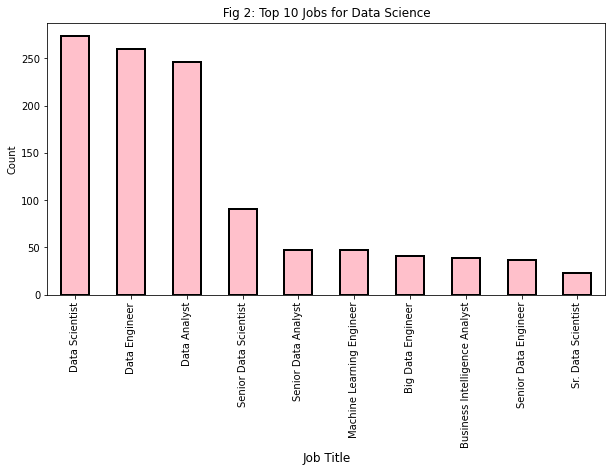

In [18]:
#Plot the top 10 job for data scientist
plt.figure(figsize = (10,5))
df["Job Title"].value_counts().sort_values(ascending=False).head(10).plot.bar(color= "pink", fontsize=10, edgecolor='black',linewidth = 2)
plt.title(" Fig 2: Top 10 Jobs for Data Science ")
plt.xlabel("Job Title",fontsize=12)
plt.ylabel("Count")
plt.show()

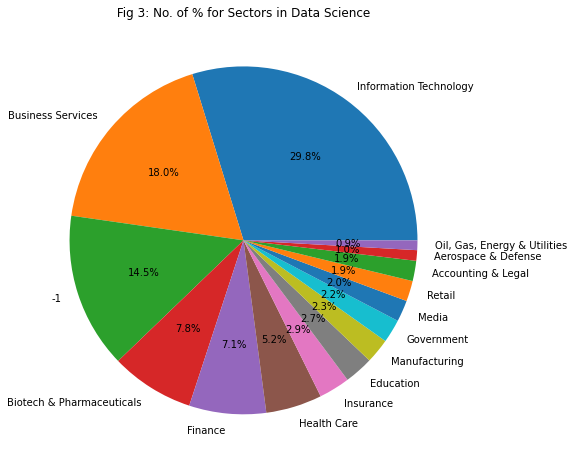

In [19]:
# Pie chart for the No. of % in Data Science Sectors
plt.figure(figsize = (50,8))
df["Sector"].value_counts().sort_values(ascending=False).head(15).plot.pie(y="Sector",autopct="%0.1f%%")
plt.title(" Fig 3: No. of % for Sectors in Data Science ")
plt.axis("off")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


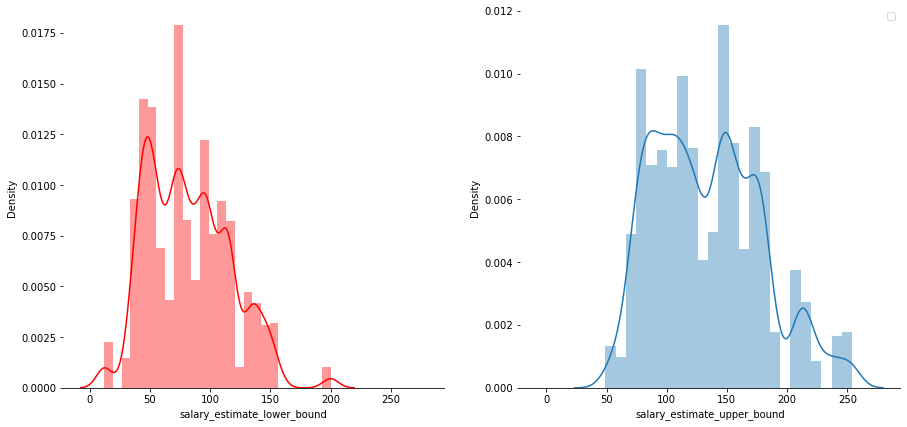

In [20]:
# Plot the salary estimate  Upper and lower bounds 
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(df['salary_estimate_lower_bound'],color = 'r',ax = axes[0])
sns.distplot(df['salary_estimate_upper_bound'],ax = axes[1])
plt.legend();

In [21]:
#pot Top 10 Average Salary in Each Location
dataview_top=df.groupby('Location')[['salary_estimate_upper_bound','salary_estimate_lower_bound']].mean().sort_values(['salary_estimate_upper_bound','salary_estimate_lower_bound'],ascending=False).head(10)
dataview_top.reset_index(inplace = True)
print(dataview_top, '\n')

               Location  salary_estimate_upper_bound  \
0    Queens Village, NY                     254.0000   
1  Rockville Centre, NY                     254.0000   
2          Stanford, CA                     237.0000   
3            Newark, CA                     211.2000   
4    Franklin Lakes, NJ                     210.0000   
5   Port Washington, NY                     210.0000   
6            Duarte, CA                     208.0000   
7      Sherman Oaks, CA                     208.0000   
8         Livermore, CA                     202.7500   
9      Redwood City, CA                     200.6875   

   salary_estimate_lower_bound  
0                       156.00  
1                       156.00  
2                       150.00  
3                       140.20  
4                       129.00  
5                       129.00  
6                       132.00  
7                       132.00  
8                       137.50  
9                       138.75   



In [22]:
# Revenue varaible visualization
df['Revenue'].unique().tolist()

[nan,
 '$100 to $500 million (USD)',
 '$500 million to $1 billion (USD)',
 '$10+ billion (USD)',
 '$25 to $50 million (USD)',
 '$1 to $5 million (USD)',
 '$5 to $10 billion (USD)',
 '-1',
 '$5 to $10 million (USD)',
 '$50 to $100 million (USD)',
 '$1 to $2 billion (USD)',
 '$2 to $5 billion (USD)',
 'Less than $1 million (USD)',
 '$10 to $25 million (USD)']

In [28]:
dataview = df.copy()
dataview['Revenue'].replace(['Unknown / Non-Applicable'], np.nan, inplace = True)
dataview['Revenue'].dropna(axis = 0, inplace = True)
dataview = dataview.groupby('Revenue')['Job Title'].count().reset_index()
dataview.sort_values('Job Title', ascending = False, inplace = True)
dataview

,Revenue,Job Title
3,$10+ billion (USD),599
4,$100 to $500 million (USD),338
11,-1,229
9,$50 to $100 million (USD),214
5,$2 to $5 billion (USD),211
2,$10 to $25 million (USD),191
0,$1 to $2 billion (USD),180
1,$1 to $5 million (USD),170
6,$25 to $50 million (USD),143
7,$5 to $10 billion (USD),133


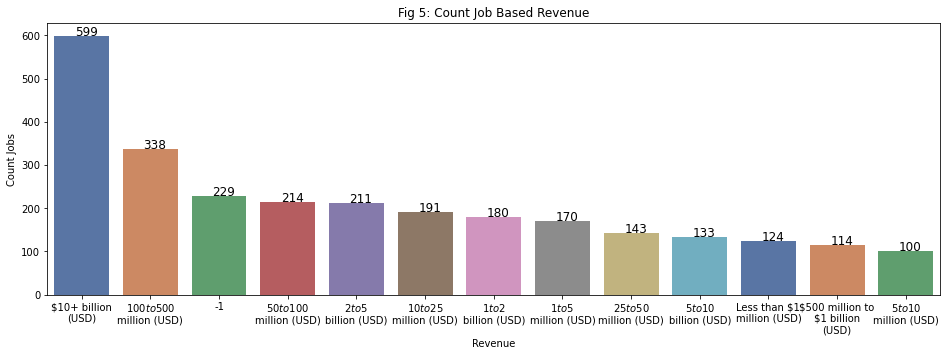

In [29]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,5))
sns.barplot(ax = ax, data = dataview, x='Revenue', y = 'Job Title', palette = 'deep')
ax.set_title('Fig 5: Count Job Based Revenue')
ax.set_ylabel('Count Jobs')
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
for index,dataview in enumerate(dataview['Job Title'].astype(int)):
        ax.text(x=index-0.1 , y =dataview+1 , s=f"{dataview}" , fontdict=dict(fontsize=12))
plt.show()

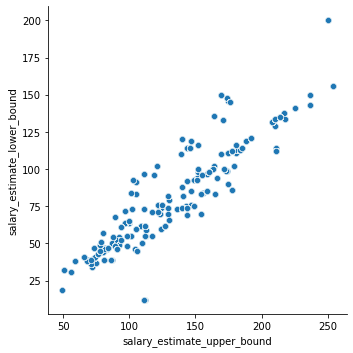

In [25]:
#Scatter plot for lower and upper bound salary
sns.relplot(data=df, x="salary_estimate_upper_bound", y="salary_estimate_lower_bound",kind="scatter")